<a href="https://colab.research.google.com/github/im-p/synteettinen_data/blob/master/generate_correlated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generoitu data GAN-verkkoa varten 

In [0]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
%tensorflow_version 1.x
print(tf.__version__)

1.15.0


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/im-p/synteettinen_data/master/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [0]:
"""
def random_dates(start, end, n, unit='D', seed=None):
    if not seed:  # from piR's answer
        np.random.seed(0)

    ndays = (end - start).days + 1
    return start + pd.to_timedelta(
        np.random.randint(0, ndays, n), unit=unit
    )

start = pd.to_datetime("2018-03-31")
end = pd.to_datetime("2019-11-19")
dates = random_dates(start, end, 10000)
"""

'\ndef random_dates(start, end, n, unit=\'D\', seed=None):\n    if not seed:  # from piR\'s answer\n        np.random.seed(0)\n\n    ndays = (end - start).days + 1\n    return start + pd.to_timedelta(\n        np.random.randint(0, ndays, n), unit=unit\n    )\n\nstart = pd.to_datetime("2018-03-31")\nend = pd.to_datetime("2019-11-19")\ndates = random_dates(start, end, 10000)\n'

In [0]:
#Generate random patient id
df["patient_id"] = np.random.choice(range(100000), 10000, replace = False)
df

,Gender,Height,Weight,patient_id
0,Male,73.847017,241.893563,87341
1,Male,68.781904,162.310473,95543
2,Male,74.110105,212.740856,67625
3,Male,71.730978,220.042470,70919
4,Male,69.881796,206.349801,90969
...,...,...,...,...
9995,Female,66.172652,136.777454,37175
9996,Female,67.067155,170.867906,33543
9997,Female,63.867992,128.475319,94006
9998,Female,69.034243,163.852461,96072


In [0]:
df.patient_id.value_counts()

34815    1
1346     1
47307    1
99801    1
99658    1
        ..
36196    1
76726    1
84604    1
78459    1
59397    1
Name: patient_id, Length: 10000, dtype: int64

### bmi

In [0]:
df.Height = (df.Height * 2.54) / 100

In [0]:
df.Weight = df.Weight * 0.45359237

In [0]:
df["bmi"] = np.round(df.Weight/ (df.Height * df.Height), 2)

In [0]:
df

,Gender,Height,Weight,patient_id,bmi
0,Male,1.875714,109.721075,87341,31.19
1,Male,1.747060,73.622792,95543,24.12
2,Male,1.882397,96.497629,67625,27.23
3,Male,1.821967,99.809586,70919,30.07
4,Male,1.774998,93.598695,90969,29.71
...,...,...,...,...,...
9995,Female,1.680785,62.041210,37175,21.96
9996,Female,1.703506,77.504378,33543,26.71
9997,Female,1.622247,58.275424,94006,22.14
9998,Female,1.753470,74.322226,96072,24.17


### bmi luokka

In [0]:
bmilist = []
for bmi in df.bmi:
    if (bmi < 18.5):
        bmilist.append("underweight")

    elif ( bmi >= 18.5 and bmi < 25):
        bmilist.append("healthy")

    elif ( bmi >= 25 and bmi < 30):
        bmilist.append("overweight")

    elif ( bmi >=30):
        bmilist.append("severely overweight")

df["bmi_class"] = bmilist
df

,Gender,Height,Weight,patient_id,bmi,bmi_class
0,Male,1.875714,109.721075,87341,31.19,severely overweight
1,Male,1.747060,73.622792,95543,24.12,healthy
2,Male,1.882397,96.497629,67625,27.23,overweight
3,Male,1.821967,99.809586,70919,30.07,severely overweight
4,Male,1.774998,93.598695,90969,29.71,overweight
...,...,...,...,...,...,...
9995,Female,1.680785,62.041210,37175,21.96,healthy
9996,Female,1.703506,77.504378,33543,26.71,overweight
9997,Female,1.622247,58.275424,94006,22.14,healthy
9998,Female,1.753470,74.322226,96072,24.17,healthy


In [0]:
df.bmi_class.value_counts()

overweight             5590
healthy                4112
severely overweight     256
underweight              42
Name: bmi_class, dtype: int64

### tapahtumat

In [0]:
#events
import random
so = ["laakarikaynti 1", "laakarikaynti 2", "laakarikaynti 3", "laakarikaynti 4", "ei jatkotoimenpiteita"]
he = ["laakarikaynti 1", "ei jatkotoimenpiteita", "ei jatkotoimenpiteita", "ei jatkotoimenpiteita", "ei jatkotoimenpiteita"]
ov = ["laakarikaynti 1", "laakarikaynti 2", "laakarikaynti 3", "laakarikaynti 4", "ei jatkotoimenpiteita"]
uv = ["laakarikaynti 1", "laakarikaynti 2", "laakarikaynti 3", "laakarikaynti 4", "ei jatkotoimenpiteita"]


In [0]:
def generate_events(df_column):
    events = []
    
    for value in df.bmi_class:
        if value == "severely overweight":
            result = random.choice(so)
            events.append(result)
        if value == "healthy":
            result = random.choice(he)
            events.append(result)
        if value == "overweight":
            result = random.choice(ov)
            events.append(result)
        if value == "underweight":
            result == random.choice(uv)
            events.append(result)

    events_df = pd.DataFrame(data = events)
    return events_df

In [0]:
events1 = generate_events(df.bmi_class)
events2 = generate_events(df.bmi_class)
events3 = generate_events(df.bmi_class)
events4 = generate_events(df.bmi_class)

In [0]:
events = pd.concat([events1, events2, events3, events4], axis = 1)
events.columns = [2017, 2018, 2019, 2020]
events

,2017,2018,2019,2020
0,laakarikaynti 4,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 2
1,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita,ei jatkotoimenpiteita
2,laakarikaynti 1,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 2
3,ei jatkotoimenpiteita,laakarikaynti 2,laakarikaynti 1,ei jatkotoimenpiteita
4,laakarikaynti 4,laakarikaynti 3,ei jatkotoimenpiteita,ei jatkotoimenpiteita
...,...,...,...,...
9995,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita
9996,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 3,laakarikaynti 1
9997,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 1
9998,ei jatkotoimenpiteita,ei jatkotoimenpiteita,ei jatkotoimenpiteita,ei jatkotoimenpiteita


In [0]:
data = pd.concat([df, events], axis = 1)
data

,Gender,Height,Weight,patient_id,bmi,bmi_class,2017,2018,2019,2020
0,Male,1.875714,109.721075,87341,31.19,severely overweight,laakarikaynti 4,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 2
1,Male,1.747060,73.622792,95543,24.12,healthy,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita,ei jatkotoimenpiteita
2,Male,1.882397,96.497629,67625,27.23,overweight,laakarikaynti 1,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 2
3,Male,1.821967,99.809586,70919,30.07,severely overweight,ei jatkotoimenpiteita,laakarikaynti 2,laakarikaynti 1,ei jatkotoimenpiteita
4,Male,1.774998,93.598695,90969,29.71,overweight,laakarikaynti 4,laakarikaynti 3,ei jatkotoimenpiteita,ei jatkotoimenpiteita
...,...,...,...,...,...,...,...,...,...,...
9995,Female,1.680785,62.041210,37175,21.96,healthy,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita
9996,Female,1.703506,77.504378,33543,26.71,overweight,ei jatkotoimenpiteita,ei jatkotoimenpiteita,laakarikaynti 3,laakarikaynti 1
9997,Female,1.622247,58.275424,94006,22.14,healthy,ei jatkotoimenpiteita,laakarikaynti 1,ei jatkotoimenpiteita,laakarikaynti 1
9998,Female,1.753470,74.322226,96072,24.17,healthy,ei jatkotoimenpiteita,ei jatkotoimenpiteita,ei jatkotoimenpiteita,ei jatkotoimenpiteita


In [0]:
events_dummies = pd.get_dummies(events)
bmi_dummies = pd.get_dummies(df)
bmi_dummies

,Height,Weight,patient_id,bmi,Gender_Female,Gender_Male,bmi_class_healthy,bmi_class_overweight,bmi_class_severely overweight,bmi_class_underweight
0,1.875714,109.721075,87341,31.19,0,1,0,0,1,0
1,1.747060,73.622792,95543,24.12,0,1,1,0,0,0
2,1.882397,96.497629,67625,27.23,0,1,0,1,0,0
3,1.821967,99.809586,70919,30.07,0,1,0,0,1,0
4,1.774998,93.598695,90969,29.71,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1.680785,62.041210,37175,21.96,1,0,1,0,0,0
9996,1.703506,77.504378,33543,26.71,1,0,0,1,0,0
9997,1.622247,58.275424,94006,22.14,1,0,1,0,0,0
9998,1.753470,74.322226,96072,24.17,1,0,1,0,0,0


In [0]:
dummies = pd.concat([bmi_dummies, events_dummies], axis = 1)
dummies

,Height,Weight,patient_id,bmi,Gender_Female,Gender_Male,bmi_class_healthy,bmi_class_overweight,bmi_class_severely overweight,bmi_class_underweight,2017_ei jatkotoimenpiteita,2017_laakarikaynti 1,2017_laakarikaynti 2,2017_laakarikaynti 3,2017_laakarikaynti 4,2018_ei jatkotoimenpiteita,2018_laakarikaynti 1,2018_laakarikaynti 2,2018_laakarikaynti 3,2018_laakarikaynti 4,2019_ei jatkotoimenpiteita,2019_laakarikaynti 1,2019_laakarikaynti 2,2019_laakarikaynti 3,2019_laakarikaynti 4,2020_ei jatkotoimenpiteita,2020_laakarikaynti 1,2020_laakarikaynti 2,2020_laakarikaynti 3,2020_laakarikaynti 4
0,1.875714,109.721075,87341,31.19,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1.747060,73.622792,95543,24.12,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1.882397,96.497629,67625,27.23,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1.821967,99.809586,70919,30.07,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,1.774998,93.598695,90969,29.71,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.680785,62.041210,37175,21.96,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9996,1.703506,77.504378,33543,26.71,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9997,1.622247,58.275424,94006,22.14,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
9998,1.753470,74.322226,96072,24.17,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


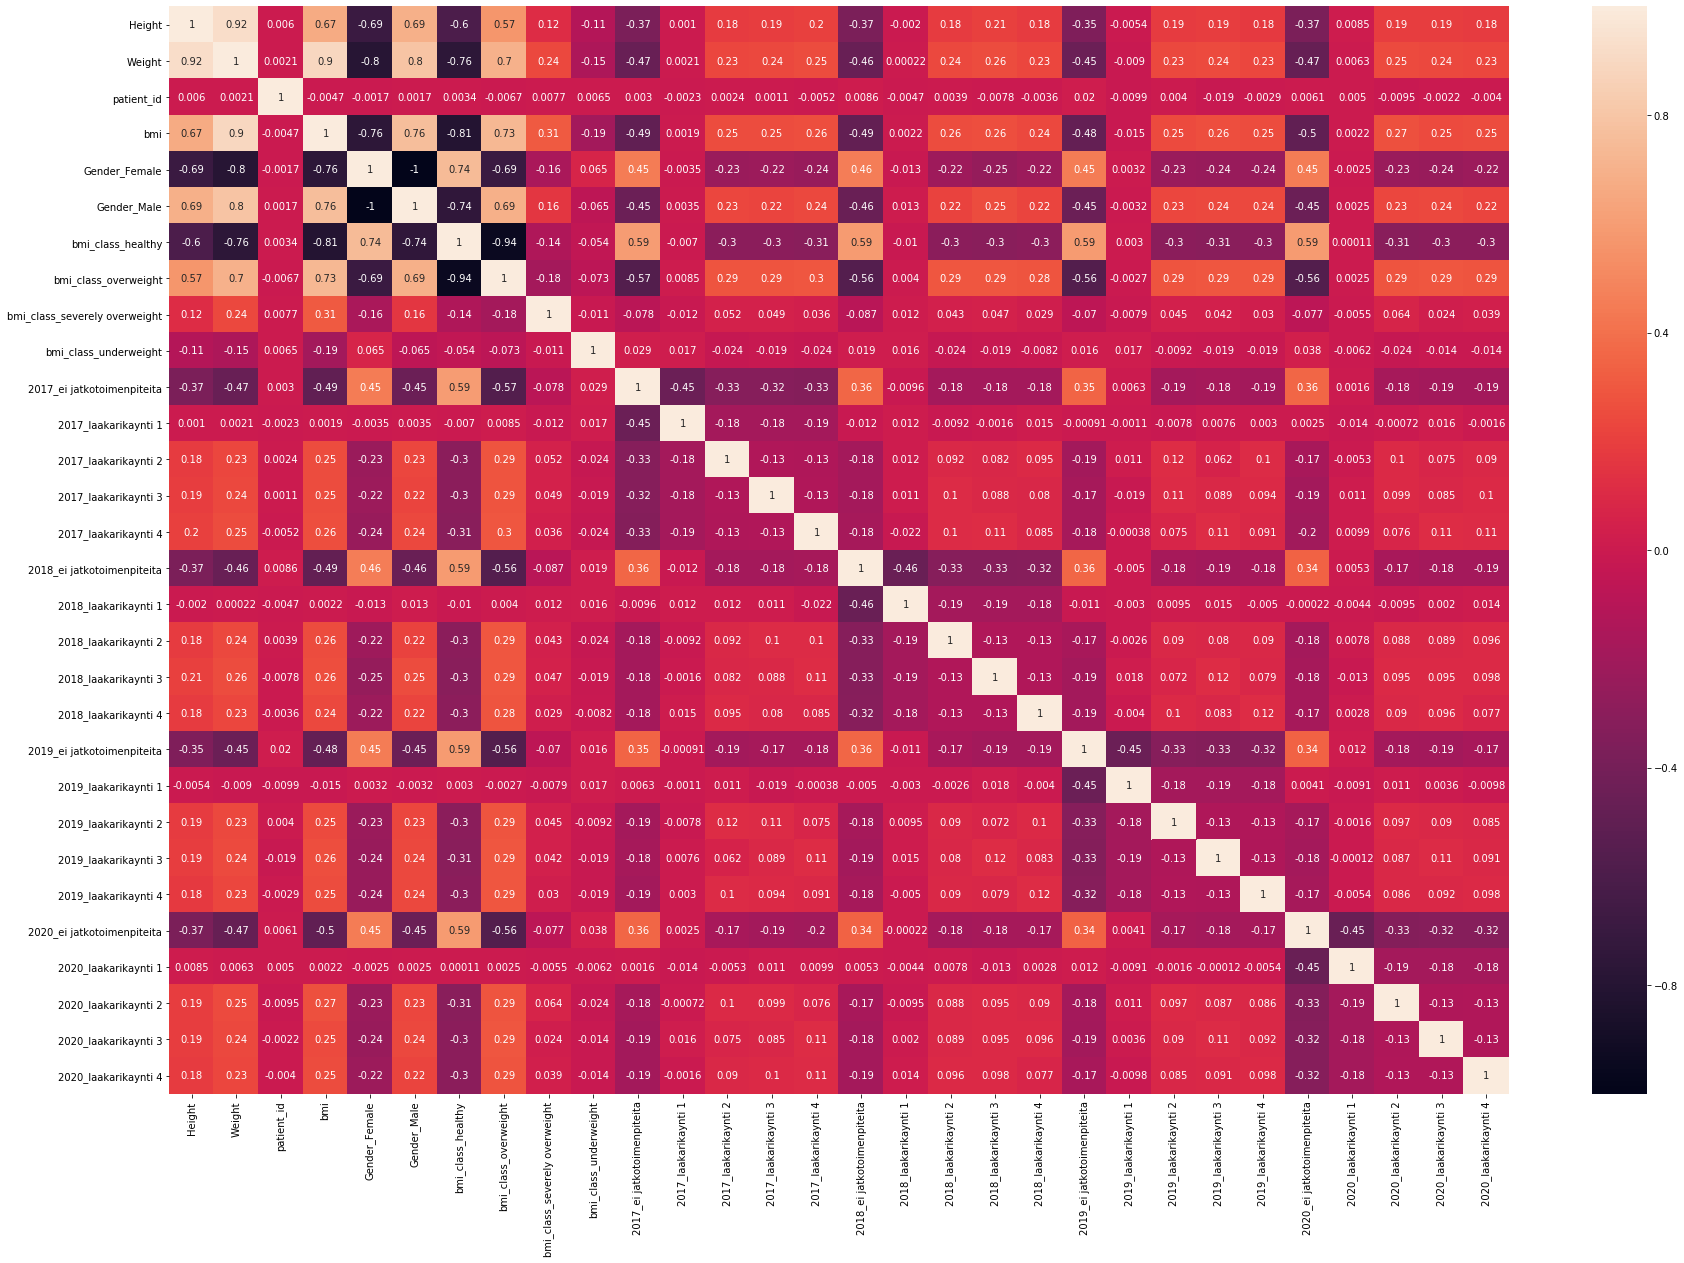

In [0]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.heatmap(dummies.corr(), annot = True)

In [0]:
#from google.colab import files
#data.to_csv("data.csv", index = False)
#files.download("data.csv")